In [318]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv("/Users/minsu/Desktop/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [322]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [324]:
X_scaled = X_scaled.reshape(-1, 2, 4, 1)

In [326]:
# 훈련 세트와 검증 세트로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [328]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [330]:
# 1. 사전 학습된 모델 불러오기
pretrained_model = load_model('cnn_diabetes_model.h5', compile=False)

# 2. 새로운 입력 텐서를 정의
input_tensor = Input(shape=(2, 4, 1))  # 모델의 입력 모양과 동일하게 정의

# 3. 기존 Sequential 모델의 레이어를 새로운 입력에 연결
x = pretrained_model(input_tensor)

# 4. 추가적인 층과 출력층 추가
x = Dense(64, activation='relu')(x)  # 새로운 밀집 레이어 추가
x = Dropout(0.5)(x)  # 드롭아웃으로 과적합 방지
output = Dense(1, activation='sigmoid')(x)  # 이진 분류용 새로운 출력층

# 5. 새로운 모델 정의 (Functional API)
fine_tuned_model = Model(inputs=input_tensor, outputs=output)

In [332]:
# 6. 모델 컴파일
fine_tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. 모델 학습 (fine-tuning)
history = fine_tuned_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5217 - loss: 0.6901 - val_accuracy: 0.7468 - val_loss: 0.6708
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7454 - loss: 0.6723 - val_accuracy: 0.7857 - val_loss: 0.6603
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7090 - loss: 0.6645 - val_accuracy: 0.7922 - val_loss: 0.6476
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7721 - loss: 0.6458 - val_accuracy: 0.7857 - val_loss: 0.6340
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7416 - loss: 0.6462 - val_accuracy: 0.7922 - val_loss: 0.6214
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7602 - loss: 0.6284 - val_accuracy: 0.7987 - val_loss: 0.6073
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7716 - loss: 0.6102 - val_accuracy: 0.8117 - val_loss: 0.5925
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7826 - loss: 0.5959 - val_accuracy: 0.8117 - v

In [333]:
from sklearn.metrics import accuracy_score, f1_score
y_pred_clf = fine_tuned_model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
acc: 0.78


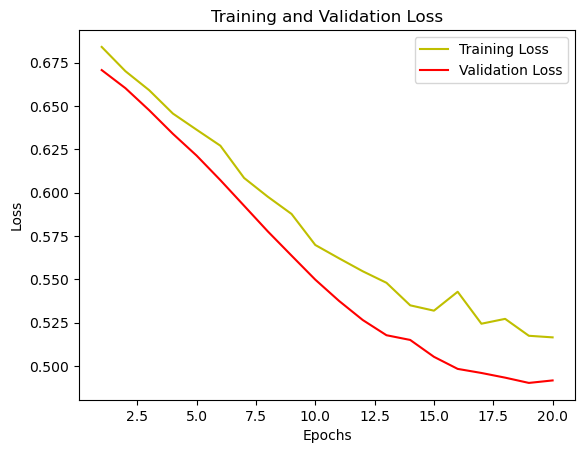

In [334]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

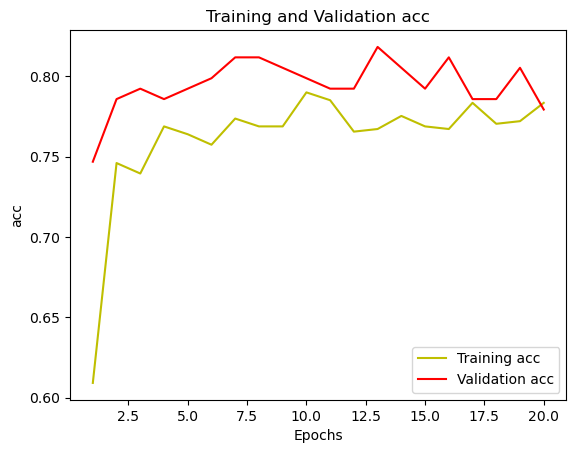

In [335]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()